In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# task 1

train = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv', index_col = 'date', parse_dates = ['date'])
test = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv', index_col = 'date', parse_dates = ['date'])

In [3]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


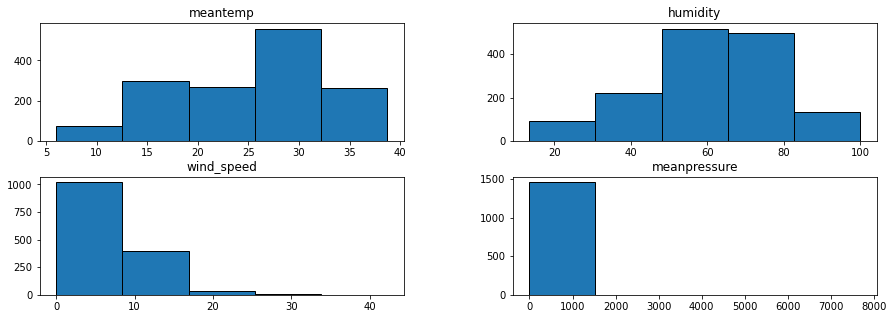

In [5]:
train.hist(figsize=(15, 5), bins = 5, grid = False, edgecolor = 'black');

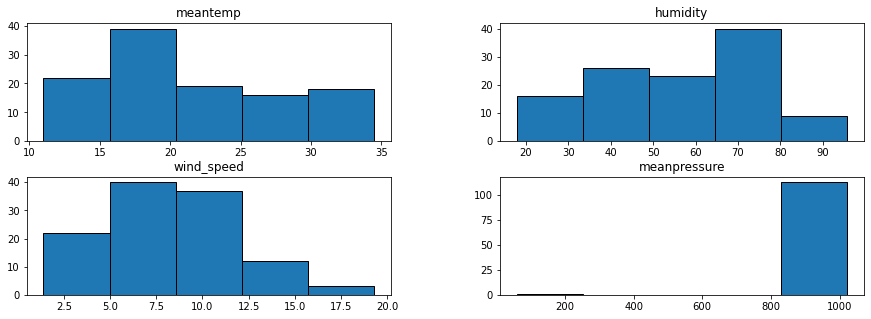

In [6]:
test.hist(figsize=(15, 5), bins  =5, grid = False, edgecolor = 'black');

In [7]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:
test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [9]:
train = pd.DataFrame(train['meantemp'])
train

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [10]:
test = pd.DataFrame(test['meantemp'])
test

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [11]:
"""decomposition = seasonal_decompose(train, period = 365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(train,label='Acual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')"""

"decomposition = seasonal_decompose(train, period = 365)\nd_trend = decomposition.trend\nd_seasonal = decomposition.seasonal\nd_residual = decomposition.resid\n\n# plotting all the 4 graphs\nfig,ax = plt.subplots(4,1,figsize=(20,12))\n\nplt.subplot(411)\nplt.plot(train,label='Acual')\nplt.legend()\n\nplt.subplot(412)\nplt.plot(d_trend,label='Trend')\nplt.legend()\n\nplt.subplot(413)\nplt.plot(d_seasonal,label='Seasonal')\nplt.legend()\n\nplt.subplot(414)\nplt.plot(d_residual,label='Residual')\nplt.legend(loc='best')"

In [12]:
def checkstationary(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = 'Data is Stationary'
    else:
        msg = 'Data is not Stationary'
    
    return msg

print(checkstationary(train))

0.2774121372301621
Data is not Stationary


In [13]:
for i in range(1,25):
    train_diff = train - train.shift(i)
    train_diff.dropna(inplace = True)
    if checkstationary(train_diff) == 'Data is Stationary':
        print(f'Data is Stationary')
        break

2.7648631375944076e-29
Data is Stationary


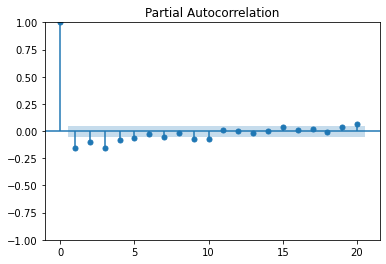

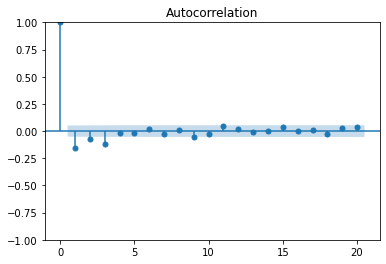

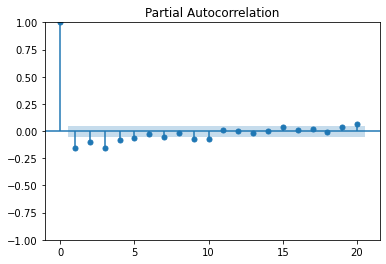

In [14]:
plot_acf(train_diff, lags = 20)
plot_pacf(train_diff, lags = 20)

In [15]:
# task 2

mod1 = ARIMA(train, order = (1,1,1))
mfit1 = mod1.fit() 
mfit1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Thu, 02 Mar 2023   AIC                           5542.478
Time:                        21:25:20   BIC                           5558.339
Sample:                    01-01-2013   HQIC                          5548.395
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.000       2.449       2.730
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               255.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
mod2 = ARIMA(train, order = (1,2,1))
mfit2 = mod2.fit()
mfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2806.407
Date:                Thu, 02 Mar 2023   AIC                           5618.814
Time:                        21:25:21   BIC                           5634.673
Sample:                    01-01-2013   HQIC                          5624.730
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1604      0.020     -7.876      0.000      -0.200      -0.120
ma.L1         -1.0000      0.220     -4.552      0.000      -1.431      -0.569
sigma2         2.7218      0.594      4.580      0.000       1.557       3.887
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               272.22
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.49
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
mod3 = ARIMA(train, order = (2,1,1))
mfit3 = mod3.fit()
mfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2768.059
Date:                Thu, 02 Mar 2023   AIC                           5544.118
Time:                        21:25:21   BIC                           5565.266
Sample:                    01-01-2013   HQIC                          5552.007
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5709      0.050     11.344      0.000       0.472       0.670
ar.L2         -0.0180      0.028     -0.641      0.521      -0.073       0.037
ma.L1         -0.7930      0.047    -17.030      0.000      -0.884      -0.702
sigma2         2.5889      0.072     35.971      0.000       2.448       2.730
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               260.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
mod4 = ARIMA(train, order = (3,2,1))
mfit4 = mod4.fit()
mfit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2780.802
Date:                Thu, 02 Mar 2023   AIC                           5571.604
Time:                        21:25:23   BIC                           5598.035
Sample:                    01-01-2013   HQIC                          5581.464
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1931      0.021     -9.350      0.000      -0.234      -0.153
ar.L2         -0.1294      0.024     -5.378      0.000      -0.177      -0.082
ar.L3         -0.1570      0.025     -6.349      0.000      -0.206      -0.109
ma.L1         -0.9999      0.039    -25.314      0.000      -1.077      -0.922
sigma2         2.6274      0.120     21.924      0.000       2.393       2.862
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               256.55
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
mod5 = ARIMA(train, order = (4,3,2))
mfit5 = mod5.fit()
mfit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(4, 3, 2)   Log Likelihood               -2786.615
Date:                Thu, 02 Mar 2023   AIC                           5587.229
Time:                        21:25:26   BIC                           5624.228
Sample:                    01-01-2013   HQIC                          5601.032
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2087      0.022     -9.672      0.000      -0.251      -0.166
ar.L2         -0.1431      0.025     -5.801      0.000      -0.192      -0.095
ar.L3         -0.1760      0.026     -6.745      0.000      -0.227      -0.125
ar.L4         -0.0834      0.024     -3.515      0.000      -0.130      -0.037
ma.L1         -1.9865      0.004   -445.517      0.000      -1.995      -1.978
ma.L2          0.9866      0.004    221.379      0.000       0.978       0.995
sigma2         2.6346      0.077     34.341      0.000       2.484       2.785
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               314.14
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.60
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
mod6 = ARIMA(train, order = (1,2,3))
mfit6 = mod6.fit()
mfit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2799.693
Date:                Thu, 02 Mar 2023   AIC                           5609.386
Time:                        21:25:28   BIC                           5635.817
Sample:                    01-01-2013   HQIC                          5619.246
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9938      0.014    -70.196      0.000      -1.022      -0.966
ma.L1         -0.2222      0.167     -1.334      0.182      -0.549       0.104
ma.L2         -0.9877      0.130     -7.588      0.000      -1.243      -0.733
ma.L3          0.2100      0.039      5.359      0.000       0.133       0.287
sigma2         2.6965      0.445      6.059      0.000       1.824       3.569
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):               247.02
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.47
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
pvalue = sm.stats.acorr_ljungbox(mfit4.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0')
    
else:
    print('Accept Ho')

[0.16302508]
Accept Ho


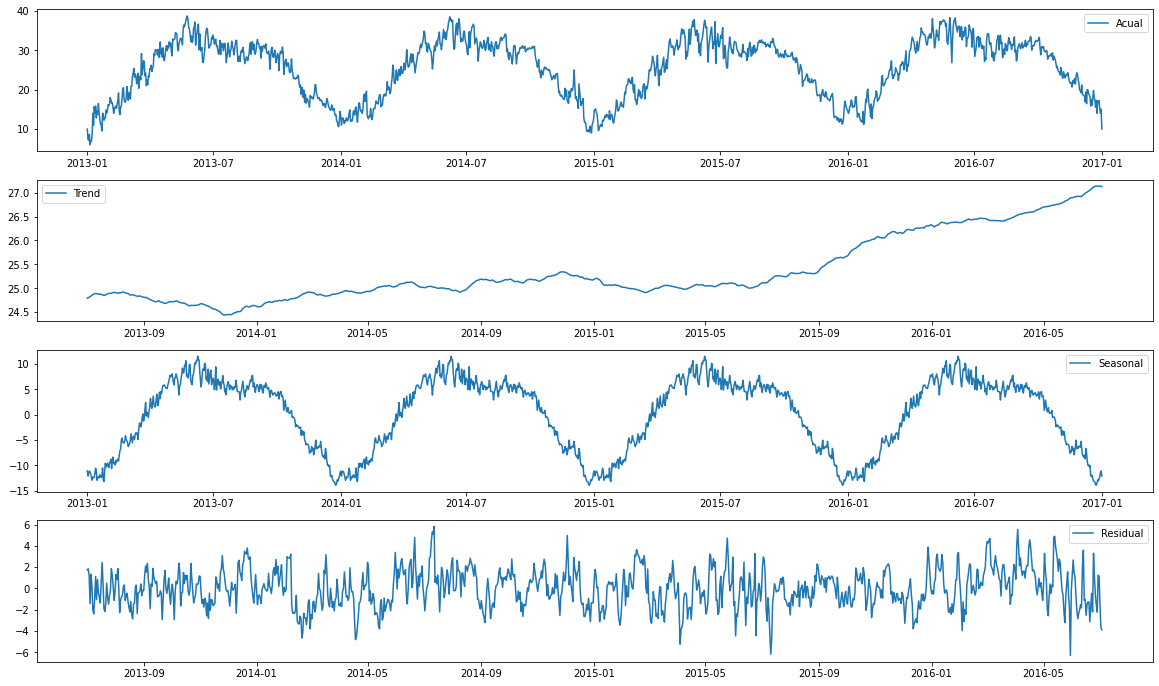

In [22]:
# task 3

decomposition = seasonal_decompose(train, period = 365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(train,label='Acual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [23]:
sari = sm.tsa.statespace.SARIMAX(train, order = (10,1,1) , seasonal_order = (2,1,1,11)).fit()
sari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            meantemp   No. Observations:                 1462
Model:             SARIMAX(10, 1, 1)x(2, 1, 1, 11)   Log Likelihood               -2766.658
Date:                             Thu, 02 Mar 2023   AIC                           5563.316
Time:                                     21:26:07   BIC                           5642.505
Sample:                                 01-01-2013   HQIC                          5592.867
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3074      0.324      0.950      0.342      -0.327       0.942
ar.L2         -0.0487      0.075     -0.645      0.519      -0.196       0.099
ar.L3         -0.1182      0.057     -2.086      0.037      -0.229      -0.007
ar.L4         -0.0148      0.072     -0.206      0.837      -0.156       0.126
ar.L5         -0.0373      0.048     -0.774      0.439      -0.132       0.057
ar.L6         -0.0175      0.041     -0.426      0.670      -0.098       0.063
ar.L7         -0.0451      0.031     -1.467      0.142      -0.105       0.015
ar.L8         -0.0046      0.037     -0.126      0.900      -0.077       0.068
ar.L9         -0.0696      0.031     -2.262      0.024      -0.130      -0.009
ar.L10        -0.0254      0.041     -0.620      0.536      -0.106       0.055
ma.L1         -0.5307      0.325     -1.635      0.102      -1.167       0.106
ar.S.L11       0.0614      0.034      1.821      0.069      -0.005       0.127
ar.S.L22       0.0213      0.027      0.791      0.429      -0.032       0.074
ma.S.L11      -0.9994      0.217     -4.596      0.000      -1.426      -0.573
sigma2         2.5669      0.549      4.675      0.000       1.491       3.643
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               207.26
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
predictions = sari.predict(0, len(test) -1)
predictions

2013-01-01     0.000000
2013-01-02     9.999996
2013-01-03     7.400001
2013-01-04     7.166664
2013-01-05     8.666667
                ...    
2013-04-20    29.811432
2013-04-21    31.511076
2013-04-22    29.439429
2013-04-23    26.859595
2013-04-24    29.759713
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

In [25]:
actual=[]
pred =[]

for i in range(len(predictions)):
    actual.append(test['meantemp'][i])
    pred.append(predictions[i])

dfer = pd.DataFrame({'actual':actual ,'predicted':pred})
dfer['error'] = dfer.actual - dfer.predicted
dfer

,actual,predicted,error
0,15.913043,0.000000,15.913043
1,18.500000,9.999996,8.500004
2,17.111111,7.400001,9.711110
3,18.700000,7.166664,11.533336
4,18.388889,8.666667,9.722222
...,...,...,...
109,34.500000,29.811432,4.688568
110,34.250000,31.511076,2.738924
111,32.900000,29.439429,3.460571
112,32.875000,26.859595,6.015405


<AxesSubplot:>

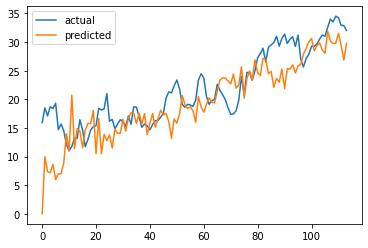

In [26]:
dfer[['actual','predicted']].plot()

In [27]:
mse = mean_squared_error(dfer['actual'],dfer['predicted'])
mse, np.sqrt(mse)

(21.302126083369025, 4.615422633234038)